In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_csv('train_modelling_rfe.csv')
df

,full_sq,num_room,state,culture_objects_top_25,build_count_monolith,ttk_km,railroad_km,cafe_count_500_na_price,cafe_count_1000_price_high,trc_count_1500,...,avg_dist_to_amenities,area_density,area_diff_sq,median_max_floor,max_floor_ratio,cpi,gdp_annual_growth,usdrub,invest_fixed_capital_per_cap,price_doc
0,43.0,2.0,2.0,0,2.0,10.918587,1.305159,0,0,9,...,3.464517,0.024279,47.993349,12.0,1.019467,354.0,0.045037,29.0048,73976.19863,5850000
1,34.0,2.0,2.0,1,4.0,3.103996,0.694536,0,0,7,...,2.336570,0.012029,47.993349,18.0,1.019467,354.0,0.045037,28.9525,73976.19863,6000000
2,43.0,2.0,2.0,0,4.0,2.927487,0.700691,0,0,1,...,0.778705,0.021153,47.993349,12.0,1.019467,354.0,0.045037,28.8082,73976.19863,5700000
3,89.0,2.0,2.0,0,50.0,14.606501,1.999265,0,0,7,...,2.509353,0.014183,47.993349,17.0,1.019467,353.2,0.045037,28.9655,73976.19863,13100000
4,77.0,2.0,2.0,0,16.0,1.721834,0.084113,3,1,9,...,1.658507,0.012880,47.993349,7.0,1.019467,353.2,0.045037,29.4625,73976.19863,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,2.0,3.0,0,5.0,8.361875,1.137603,1,0,6,...,2.748987,0.017459,38.000000,12.0,0.750000,489.5,0.007065,55.2655,131403.00000,7400000
30467,86.0,4.0,3.0,1,25.0,1.238732,0.377368,3,1,7,...,1.383730,0.010315,76.000000,17.0,0.529412,489.5,0.007065,55.2655,131403.00000,25000000
30468,45.0,1.0,1.0,0,6.0,17.148737,1.727223,0,0,0,...,5.626612,0.000157,44.000000,17.0,1.176471,489.5,0.007065,55.2655,131403.00000,6970959
30469,64.0,2.0,2.0,0,9.0,8.940313,4.898047,0,0,1,...,1.297676,0.012994,53.000000,17.0,0.882353,489.5,0.007065,55.2655,131403.00000,13500000


In [3]:
for column in df.columns.values:
    if abs(df[column].corr(df['price_doc'])) < 0.1:
        df = df.drop(column, axis=1)

df

,full_sq,num_room,state,culture_objects_top_25,build_count_monolith,ttk_km,cafe_count_1000_price_high,trc_count_1500,cafe_count_1500_price_1500,cafe_count_2000,...,kremlin_km,avg_dist_to_amenities,area_density,area_diff_sq,max_floor_ratio,cpi,gdp_annual_growth,usdrub,invest_fixed_capital_per_cap,price_doc
0,43.0,2.0,2.0,0,2.0,10.918587,0,9,6,36,...,15.156211,3.464517,0.024279,47.993349,1.019467,354.0,0.045037,29.0048,73976.19863,5850000
1,34.0,2.0,2.0,1,4.0,3.103996,0,7,1,21,...,8.698054,2.336570,0.012029,47.993349,1.019467,354.0,0.045037,28.9525,73976.19863,6000000
2,43.0,2.0,2.0,0,4.0,2.927487,0,1,2,24,...,9.067885,0.778705,0.021153,47.993349,1.019467,354.0,0.045037,28.8082,73976.19863,5700000
3,89.0,2.0,2.0,0,50.0,14.606501,0,7,8,25,...,19.487005,2.509353,0.014183,47.993349,1.019467,353.2,0.045037,28.9655,73976.19863,13100000
4,77.0,2.0,2.0,0,16.0,1.721834,1,9,72,483,...,2.578671,1.658507,0.012880,47.993349,1.019467,353.2,0.045037,29.4625,73976.19863,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,2.0,3.0,0,5.0,8.361875,0,6,6,43,...,12.599292,2.748987,0.017459,38.000000,0.750000,489.5,0.007065,55.2655,131403.00000,7400000
30467,86.0,4.0,3.0,1,25.0,1.238732,1,7,65,444,...,3.269284,1.383730,0.010315,76.000000,0.529412,489.5,0.007065,55.2655,131403.00000,25000000
30468,45.0,1.0,1.0,0,6.0,17.148737,0,0,0,7,...,21.905792,5.626612,0.000157,44.000000,1.176471,489.5,0.007065,55.2655,131403.00000,6970959
30469,64.0,2.0,2.0,0,9.0,8.940313,0,1,8,67,...,13.622569,1.297676,0.012994,53.000000,0.882353,489.5,0.007065,55.2655,131403.00000,13500000


In [5]:
for column in df.columns.values:
    if stats.skew(df[column].values) > 1:
        df[column] = np.log(df[column] + 1)

df

,full_sq,num_room,state,culture_objects_top_25,build_count_monolith,ttk_km,cafe_count_1000_price_high,trc_count_1500,cafe_count_1500_price_1500,cafe_count_2000,...,kremlin_km,avg_dist_to_amenities,area_density,area_diff_sq,max_floor_ratio,cpi,gdp_annual_growth,usdrub,invest_fixed_capital_per_cap,price_doc
0,3.784190,1.098612,1.098612,0.000000,1.098612,2.478099,0.000000,2.302585,1.945910,3.610918,...,2.782305,1.496161,0.024279,47.993349,0.702834,354.0,0.045037,3.401357,73976.19863,15.581952
1,3.555348,1.098612,1.098612,0.693147,1.609438,1.411961,0.000000,2.079442,0.693147,3.091042,...,2.271925,1.204943,0.012029,47.993349,0.702834,354.0,0.045037,3.399613,73976.19863,15.607270
2,3.784190,1.098612,1.098612,0.000000,1.609438,1.368000,0.000000,0.693147,1.098612,3.218876,...,2.309351,0.575886,0.021153,47.993349,0.702834,354.0,0.045037,3.394784,73976.19863,15.555977
3,4.499810,1.098612,1.098612,0.000000,3.931826,2.747688,0.000000,2.079442,2.197225,3.258097,...,3.019791,1.255432,0.014183,47.993349,0.702834,353.2,0.045037,3.400047,73976.19863,16.388123
4,4.356709,1.098612,1.098612,0.000000,2.833213,1.001306,0.693147,2.302585,4.290459,6.182085,...,1.274991,0.977765,0.012880,47.993349,0.702834,353.2,0.045037,3.416496,73976.19863,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,3.806662,1.098612,1.386294,0.000000,1.791759,2.236646,0.000000,1.945910,1.945910,3.784190,...,2.610018,1.321486,0.017459,38.000000,0.559616,489.5,0.007065,4.030082,131403.00000,15.816991
30467,4.465908,1.609438,1.386294,0.693147,3.258097,0.805909,0.693147,2.079442,4.189655,6.098074,...,1.451446,0.868666,0.010315,76.000000,0.424883,489.5,0.007065,4.030082,131403.00000,17.034386
30468,3.828641,0.693147,0.693147,0.000000,1.945910,2.898601,0.000000,0.000000,0.000000,2.079442,...,3.131390,1.891094,0.000157,44.000000,0.777705,489.5,0.007065,4.030082,131403.00000,15.757264
30469,4.174387,1.098612,1.098612,0.000000,2.302585,2.296598,0.000000,0.693147,2.197225,4.219508,...,2.682566,0.831898,0.012994,53.000000,0.632523,489.5,0.007065,4.030082,131403.00000,16.418200


In [6]:
X = df.drop("price_doc", axis=1)
y = df["price_doc"]

In [7]:
scaler = StandardScaler();
scaler.fit(X);
scaled_train = scaler.transform(X);

#test_scaler = StandardScaler();
#test_scaler.fit(test_df);
#scaled_test = test_scaler.transform(test_df);

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)

## Linear Regression

In [9]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

In [10]:
lr.fit(X_train, y_train)

C:\Users\pongp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=-1, normalize=True)

In [11]:
y_pred = lr.predict(X_test)

In [12]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**0.5)

MSE:  0.2277297505815883
RMSE:  0.47721038398340443


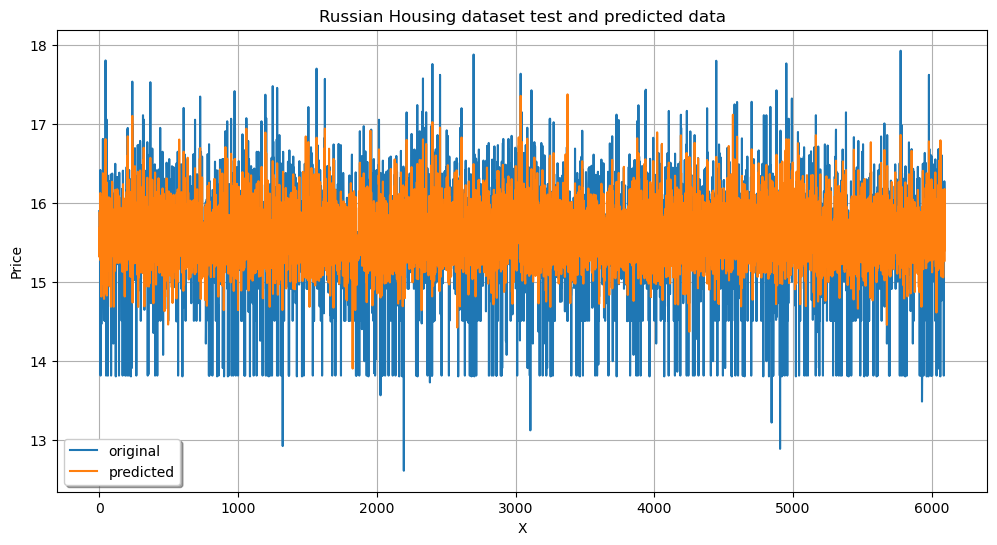

In [13]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Russian Housing dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Ridge

In [14]:
ridge = Ridge(alpha=60, copy_X=False, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
ridge.fit(X_train, y_train)

C:\Users\pongp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=60, copy_X=False, normalize=False)

In [16]:
y_pred = ridge.predict(X_test)

In [17]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**0.5)

MSE:  0.22779496954812653
RMSE:  0.47727871264925126


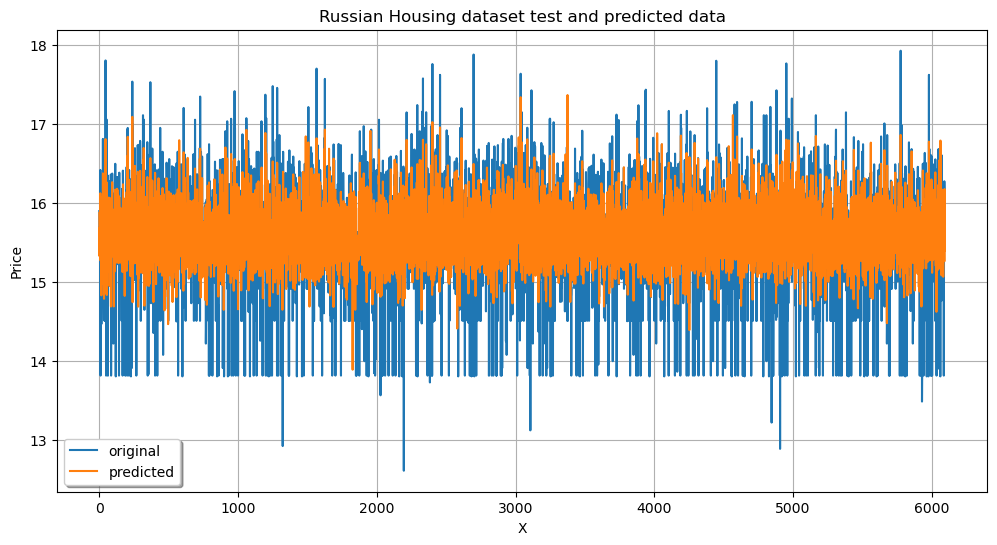

In [18]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Russian Housing dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Lasso

In [19]:
lasso = Lasso(alpha=0.001)

In [20]:
lasso.fit(X_train, y_train);

In [21]:
y_pred = ridge.predict(X_test)

In [22]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**0.5)

MSE:  0.22779496954812653
RMSE:  0.47727871264925126


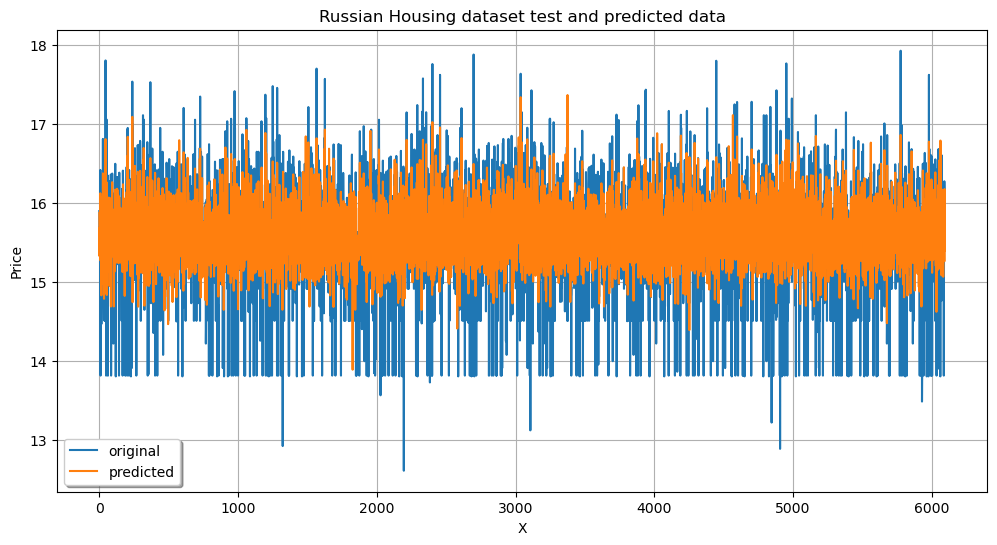

In [23]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Russian Housing dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()